---
# Exercício Breast Cancer - árvore de decisão
---
**Machine Learning em Projetos (Erick Muzart e Fernando melo)**

Usando dados do Breast Cancer, descritos no site do Sklearn Datasets

## Análise exploratória dos dados

In [ ]:
# Importar bibliotecas pandas, plot_confusion_matrix, train_test_split, matplotlib, RandomForestClassifier, numpy
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

In [ ]:
# Importar e instanciar biblioteca de dados Breast Cancer
from sklearn.datasets import load_breast_cancer
# X, y = load_breast_cancer(return_X_y=True, as_frame=True)
cancer = load_breast_cancer()

In [ ]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Mostrar os valores possíveis da variável target
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
#atribuir os valores das variáveis independentes a X e variável dependente a y
X = df.iloc[ : , :-1]
y = df.target

In [ ]:
# Separar dados em treino e teste (80/20), usando parâmetro stratify, pois as classes estão desbalanceadas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Mostrar as dimensões dos dados de treino
X_train.shape, y_train.shape

((455, 30), (455,))

In [ ]:
# Mostrar as dimensões dos dados de teste
X_test.shape, y_test.shape

((114, 30), (114,))

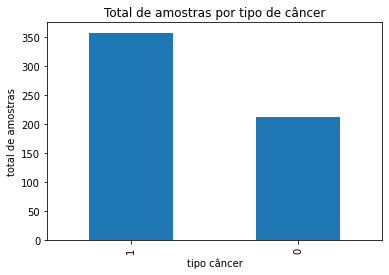

In [ ]:
# 357 benigno (1) e 212 maligno (0)
df.target.value_counts().plot(xlabel='tipo câncer', ylabel='total de amostras',
                              kind='bar', title='Total de amostras por tipo de câncer');
# print(y.value_counts())

In [ ]:
# Atribuir valores para X e y
X = df.iloc[:,:-1]
y = df.target

### Imprime árvore de decisão

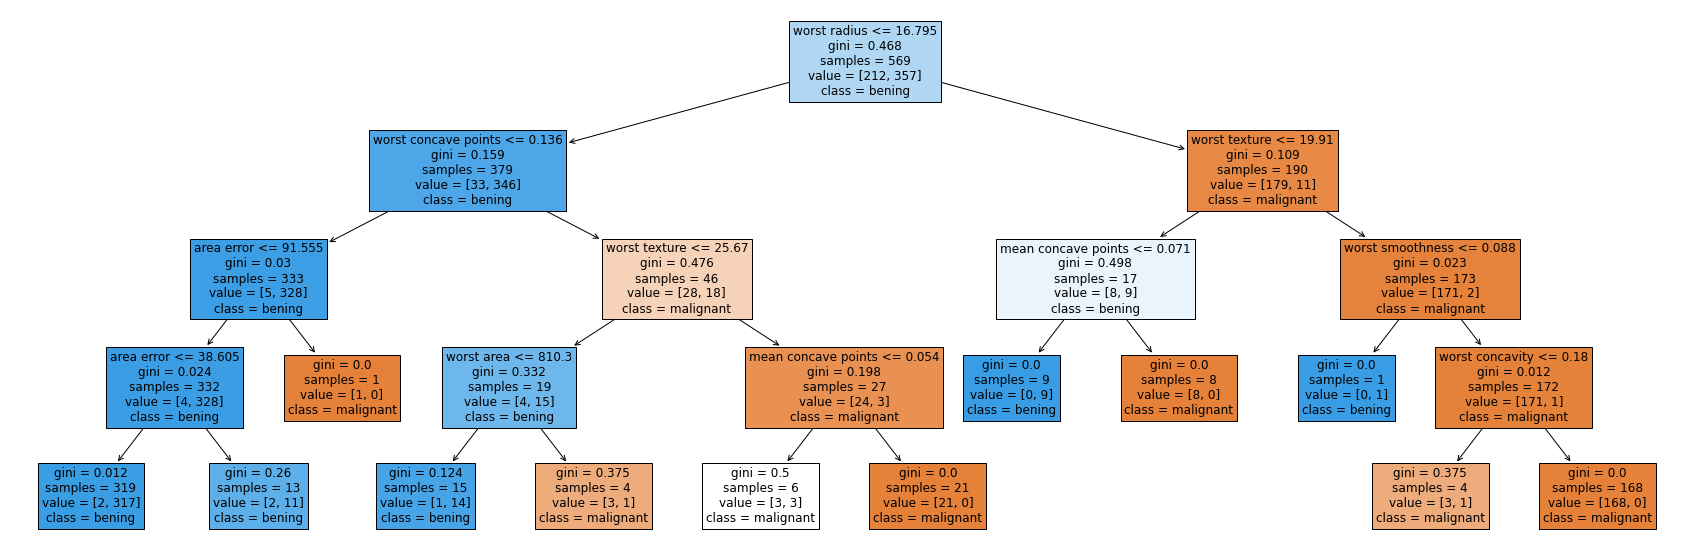

In [ ]:
# Criar árvore de decisão e plotar a árvore (plot_tree)
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=4).fit(X, y)

plt.figure(figsize=(30,10))
plot_tree(clf, filled=True, fontsize=12, feature_names=X.columns, class_names=['malignant', 'bening'])
plt.show()

In [ ]:
# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
# Treinar e mostrar desempenho (score) Regressão Logística
reg_log = LogisticRegression(max_iter=3000)
reg_log.fit(X_train, y_train)
reg_log.score(X_test, y_test)

0.9649122807017544

In [ ]:
# Treinar e mostrar desempenho (score) da Árvore de decisão
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9298245614035088

In [ ]:
# Treinar e mostrar desempenho (score) Random Forest
rf_class = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_class.fit(X_train, y_train)
rf_class.score(X_test, y_test)

0.956140350877193

---
###Árvore de decisão (decision tree):
 Em um determinado conjunto de dados de treinamento, a precisão continua melhorando com mais e mais divisões (níveis da árvore.  
 Você pode facilmente ajustar os dados em excesso (overfit), a menos que esteja usando validação cruzada (no conjunto de dados de treinamento).  
 A vantagem de uma árvore de decisão simples é que o modelo é fácil de interpretar, você sabe qual variável e qual valor dessa variável é usado para dividir os dados e prever o resultado.  Ótima ferramenta para comunicação do resultado do modelo para a área de negócios.  

 ---

###Floresta aleatória (random forest):
Random Forest é essencialmente uma coleção de Árvores de Decisão.  
Uma floresta aleatória seleciona observações/linhas aleatoriamente e características/variáveis ​​específicas para construir várias árvores de decisão e, em seguida, calcula a média dos resultados.  
Depois que um grande número de árvores é construído usando esse método, cada árvore "vota" ou escolhe a classe, e a classe que recebe a maioria dos votos por maioria simples é a "vencedora" ou classe prevista.  
É uma floresta que você pode determinar a sua estrutura. Você pode especificar o número de árvores que deseja em sua floresta (n_estimators) e também pode especificar o número máximo de recursos a serem usados ​​em cada árvore. Mas você não pode controlar a aleatoriedade, você não pode controlar qual recurso faz parte de qual árvore na floresta, você não pode controlar qual ponto de dados faz parte de qual árvore.  
A precisão continua aumentando conforme você aumenta o número de árvores, mas torna-se constante em determinado ponto. Ao contrário da árvore de decisão, ela não criará um modelo altamente tendencioso e reduzirá a variância, ou seja, difícil de ter overfitting.  

---

### Próximos passos

Que tal agora aplicarmos árvores de decisão para o problema de previsão de renda familiar no questionário socio-econômico do Enem? Qual a sequência de escolhas que melhor permite prever a renda familiar?

Árvore de regressão com gastos em publicidade (caderno base na aula 03)

Aplicação de árvores de decisão em seus projetos!

## O que ficou faltando? Como podemos melhorar a acurácia do modelo?

### Normalização

In [ ]:
# Normalização das variáveis
# Importar e instanciar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Ajustar o scaler aos dados de treinamento
scaler.fit(X_train)

StandardScaler()

In [ ]:
# Treinar e mostrar desempenho (score) Regressão Logística
reg_log = LogisticRegression(max_iter=3000)
reg_log.fit(scaler.transform(X_train), y_train)
reg_log.score(scaler.transform(X_test), y_test)

0.9824561403508771

In [ ]:
# Treinar e mostrar desempenho (score) Árvore de decisão
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(scaler.transform(X_train), y_train)
clf.score(scaler.transform(X_test), y_test)

0.9473684210526315

In [ ]:
# Treinar e mostrar desempenho (score) Random Forest

rf_class = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_class.fit(scaler.transform(X_train),y_train)
rf_class.score(scaler.transform(X_test), y_test)

0.956140350877193

### Conclusão:
- O modelo de regressão logística melhorou o desempenho!  
- Algoritmos baseados em árvore, como Decision tree, Random Forests e GBM (Gradient Boosting Machine), não são sensíveis à magnitude das variáveis. Portanto, a normalização não é necessária antes de ajustar este tipo de modelo.

### DtreeViz

In [ ]:
# Instalar biblioteca DtreeViz
!pip install -q dtreeviz

In [ ]:
# Treinar árvore de decisão com profundidade máxima de 4 níveis
clf = DecisionTreeClassifier(max_depth=4).fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


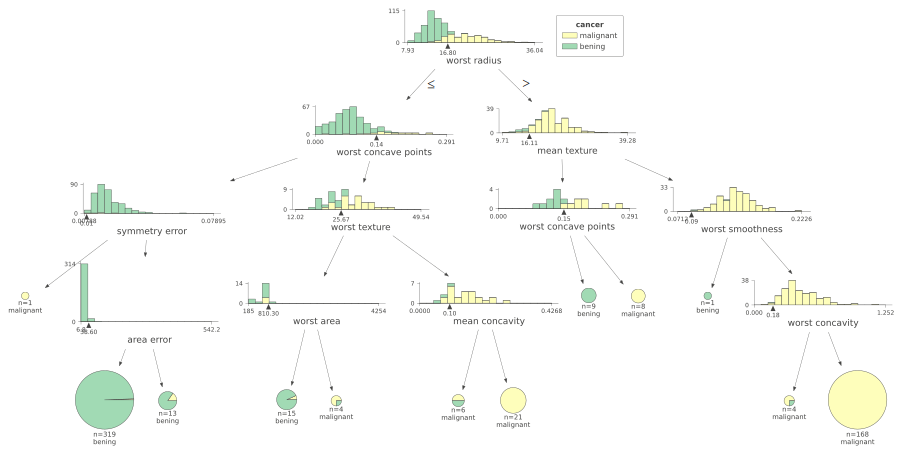

In [ ]:
# Importar biblioteca dtreeviz
from dtreeviz.trees import dtreeviz
# Criar árvore dtreeviz
viz = dtreeviz(clf, X, y,
               target_name="cancer",
               feature_names= X.columns,
               class_names= ['malignant', 'bening']
               )
# Mostrar árvore dtreeviz 
viz